In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# full dataset 디렉토리
dataset_dir = r'/content/drive/MyDrive/Gym_Equips'

In [2]:
from PIL import Image

for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()  # 이미지 파일이 손상되었는지 검증
        except (IOError, SyntaxError) as e:
            print(f"Deleting corrupted file: {file_path}")
            os.remove(file_path)

In [3]:
for category in os.listdir(dataset_dir):
    if category == '.DS_Store':  # .DS_Store 무시
        print(f"Skipping .DS_Store file in: {dataset_dir}")
        continue

    category_path = os.path.join(dataset_dir, category)

    # 디렉토리인지 확인
    if not os.path.isdir(category_path):
        print(f"Skipping non-directory item: {category_path}")
        continue

    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)

        # 지원되지 않는 파일 형식 확인 및 삭제
        if not (file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))):
            print(f"Deleting unsupported file: {file_path}")
            os.remove(file_path)


In [4]:
# train 디렉토리와 validation 디렉토리와 test 디렉토리 생성
train_dir = './dataset/training'
val_dir = './dataset/validation'
test_dir = './dataset/test'

In [5]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
print("새로운 dataset 디렉토리를 생성하였습니다.")
print()

새로운 dataset 디렉토리를 생성하였습니다.



In [6]:
categories = ['Dumbells', 'Elliptical Machine', 'Recumbent Bike', 'Smith Machine', 'leg press', 'leg curls', 'lat pulldowns', 'kettle bells', 'bench press']
category_num = len(categories)

In [7]:
import pandas as pd

import os
import shutil
from sklearn.model_selection import train_test_split

# 해당 셀은 full dataset(전체 데이터)을 data를 category별 6:2:2로 split한다.
# split된 data는 각각 training/해당category, valivation/해당category, test/해당category 에 저장된다.

# full dataset 디렉토리
dataset_dir = '/content/drive/MyDrive/Gym_Equips'

if(os.path.isdir('./dataset')):
    print(f"dataset 디렉토리가 이미 존재하여 새로운 dataset 디렉토리를 만들기 전, 삭제하였습니다. ")
    shutil.rmtree('./dataset')

# train 디렉토리와 validation 디렉토리와 test 디렉토리 생성
train_dir = './dataset/training'
val_dir = './dataset/validation'
test_dir = './dataset/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
print("새로운 dataset 디렉토리를 생성하였습니다.")
print()

categories = ['Dumbells', 'Elliptical Machine', 'Recumbent Bike', 'Smith Machine', 'leg press', 'leg curls', 'lat pulldowns', 'kettle bells', 'bench press']
category_num = len(categories)

dataset 디렉토리가 이미 존재하여 새로운 dataset 디렉토리를 만들기 전, 삭제하였습니다. 
새로운 dataset 디렉토리를 생성하였습니다.



In [8]:
# Category별로 복사
for category in categories :
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    category_path = os.path.join(dataset_dir, category)

    # Check if category path exists
    if not os.path.exists(category_path):
        print(f"Path {category_path} does not exist ")

    # Keep all files in category directory by list files_in_category
    files_in_category = [file for file in os.listdir(category_path) if os.path.join(category_path, file)]

    # split files by 6:2:2
    train_files, val_files = train_test_split(files_in_category, test_size=0.4, random_state=42)
    val_files, test_files = train_test_split(val_files, test_size=0.5, random_state=42)


    # Copy train files into ./dataset/training and ./dataset/validation and ./dataset/test
    for file in train_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(train_dir, category, file))
    print(f"{category_path}에서 {os.path.join(train_dir, category)}로 파일 {len(train_files)}개가 복사되었습니다.")

    for file in val_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(val_dir, category, file))
    print(f"{category_path}에서 {os.path.join(val_dir, category)}로 파일 {len(val_files)}개가 복사되었습니다.")

    for file in val_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(test_dir, category, file))
    print(f"{category_path}에서 {os.path.join(test_dir, category)}로 파일 {len(test_files)}개가 복사되었습니다.")
    print()


# category 확인
print(f"category의 개수는 {category_num}개이고, ")
print("category는 다음과 같습니다")
for cat in categories:
    print(f"{cat} ")
print()

/content/drive/MyDrive/Gym_Equips/Dumbells에서 ./dataset/training/Dumbells로 파일 573개가 복사되었습니다.
/content/drive/MyDrive/Gym_Equips/Dumbells에서 ./dataset/validation/Dumbells로 파일 191개가 복사되었습니다.
/content/drive/MyDrive/Gym_Equips/Dumbells에서 ./dataset/test/Dumbells로 파일 192개가 복사되었습니다.

/content/drive/MyDrive/Gym_Equips/Elliptical Machine에서 ./dataset/training/Elliptical Machine로 파일 211개가 복사되었습니다.
/content/drive/MyDrive/Gym_Equips/Elliptical Machine에서 ./dataset/validation/Elliptical Machine로 파일 71개가 복사되었습니다.
/content/drive/MyDrive/Gym_Equips/Elliptical Machine에서 ./dataset/test/Elliptical Machine로 파일 71개가 복사되었습니다.

/content/drive/MyDrive/Gym_Equips/Recumbent Bike에서 ./dataset/training/Recumbent Bike로 파일 100개가 복사되었습니다.
/content/drive/MyDrive/Gym_Equips/Recumbent Bike에서 ./dataset/validation/Recumbent Bike로 파일 33개가 복사되었습니다.
/content/drive/MyDrive/Gym_Equips/Recumbent Bike에서 ./dataset/test/Recumbent Bike로 파일 34개가 복사되었습니다.

/content/drive/MyDrive/Gym_Equips/Smith Machine에서 ./dataset/training/Smith Machine로

In [9]:
import tensorflow as tf

# Image 처리용
#from tensorflow.keras.processing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

# Model 생성용
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model layer용
from tensorflow.keras import layers

# Optimizer용
from tensorflow.keras.optimizers import Adam

# Preprocessing

# train_dir, val_dir path
train_dir = './dataset/training'
val_dir = './dataset/validation'


# Image 처리
# train_dir/어떤category, val_dir/어떤category 안에 있는 이미지들을 해당 category로 labeling 해줌
# model.fit에서 사용되는 batch_size로 배치 크기 설정

train_dataset = image_dataset_from_directory(
    directory = train_dir,
    image_size = (299, 299),
    batch_size = 32,
    label_mode='categorical'
)
val_dataset = image_dataset_from_directory(
    directory = val_dir,
    image_size = (299, 299),
    label_mode='categorical',
    batch_size = 32,
)

for images, labels in train_dataset.take(1):  # Take one batch
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("Labels:", labels)

Found 1450 files belonging to 9 classes.
Found 485 files belonging to 9 classes.
Image batch shape: (32, 299, 299, 3)
Label batch shape: (32, 9)
Labels: tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 

In [10]:
# Augmentation
data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(299,299,3)),       # RGB normalize
    layers.RandomFlip("horizontal"),   # 좌우 반전
    layers.RandomRotation(0.1),        # 회전
    layers.RandomZoom(0.1),            # 확대, 축소
    layers.RandomTranslation(0.1, 0.1) # 좌우 이동
])

# Define Model

# [최종 코드 제출 전 검토]모델 생성 방법 주석 처리
# CNN으로 3 X 3 filter 32개 사용
# MaxPooling
# FC Layer (hidden units : 128)
# FC Layer (hidden units : category 개수)

from keras import layers
from keras.models import Sequential
from keras.layers import Input

model = Sequential([
    Input(shape=(299, 299, 3)),  # 입력 크기 정의
    data_augmentation,
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(category_num, activation='softmax')
])


# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

# Train
history = model.fit(train_dataset,
         validation_data = val_dataset,
         epochs=50,
         verbose=1)

model.save('my_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 27s 453ms/step - accuracy: 0.1962 - loss: 56.0483 - val_accuracy: 0.4495 - val_loss: 2.0143
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 35s 418ms/step - accuracy: 0.4369 - loss: 1.9527 - val_accuracy: 0.4722 - val_loss: 1.8577
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 454ms/step - accuracy: 0.5233 - loss: 1.5913 - val_accuracy: 0.4082 - val_loss: 1.8790
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 430ms/step - accuracy: 0.5046 - loss: 1.5136 - val_accuracy: 0.5278 - val_loss: 1.6158
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.5524 - loss: 1.4733 - val_accuracy: 0.4887 - val_loss: 1.7646
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 545ms/step - accuracy: 0.6004 - loss: 1.3055 - val_accuracy: 0.5196 - val_loss: 1.6076
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 558ms/step - accuracy: 0.5724 - loss: 1.3069 - val_accuracy: 0.6371 - val_loss: 1.2815
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 404ms/step - accuracy: 0.6194 - loss: 1.2245 - val_acc

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 297, 297, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1401856)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     179,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 538,321,949 (2.01 GB)

 Trainable params: 179,440,649 (684.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 358,881,300 (1.34 GB)

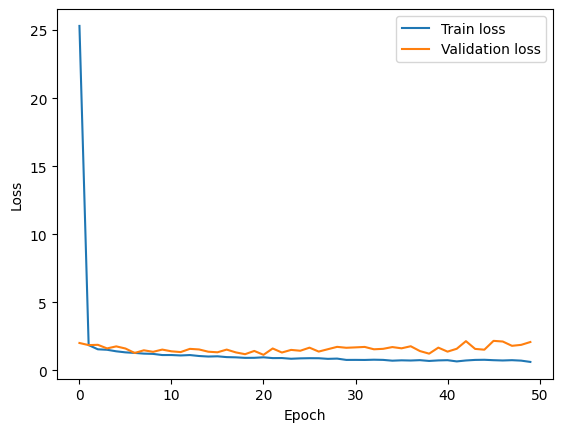

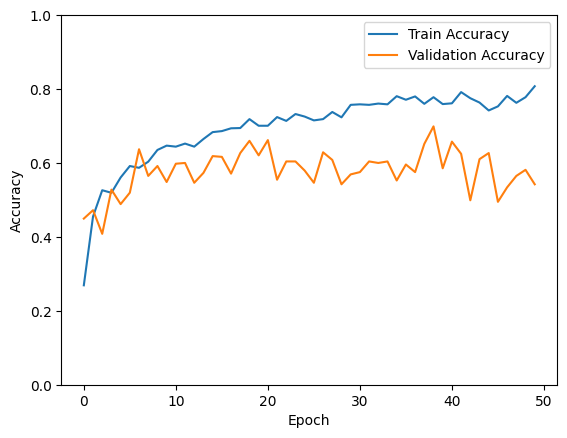

In [14]:
# Visualize the Results
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylim(0, 1.0)
plt.legend()
plt.show()

In [18]:
# 가장 정확도가 높은 모델로 test data predict하고 Visualize (confusion matrix)
# test data image visualize와 함께 predict label과 actual label 표기

# Test data predication 을 통해 최종 accuracy 확인

import numpy as np

# test_dir path
test_dir = './dataset/test'

test_dataset = image_dataset_from_directory(
    directory = test_dir,
    image_size = (299, 299),
    label_mode='categorical',
    shuffle=False,
    batch_size=32
)


all_labels = []
for _, labels in test_dataset:
    all_labels.append(np.argmax(labels.numpy(), axis=1))
all_labels = np.concatenate(all_labels, axis=0)

y_pred = np.argmax(model.predict(test_dataset), axis=1)

#for label in y_pred:
#    print(categories[label])

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(all_labels, y_pred)
print(accuracy)

Found 485 files belonging to 9 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 381ms/step
0.5422680412371134
